### 서울시 운동을 하지 않는 이유 통계
- import matplotlib.pyplot as plt 를 활용한 데이터 시각화
- fig, ax = plt.subplots(1,2, figsize=(16,8))를 활용한 다중 시각화 그래프 생성
        - 행, 열 = 표시할 시각화 데이터 수량
    - 1. pie 그래프 생성
        - raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0,0.02], ax=ax[0])
            - explode: 데이터간 간격
            - ax=ax[0] 다중 그래프들간 순서
    - 2. SNS를 활용한 막대 그래프
        - f, ax = plt.subplots(figsize = (12,8))
        - sns.barplot(x='남자', y='구분.1', data=smoke_age, color ='b')
        - sns.barplot(x='전체', y='구분.1', data=smoke_age, color ='r')

In [1]:
# 폰트 확인
from matplotlib import font_manager

f_path = "C://Windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()

'Malgun Gothic'

In [2]:
# 폰트 셋팅
from matplotlib import rc

rc('font',family='Malgun Gothic')

Text(0.5, 1.0, '안녕')

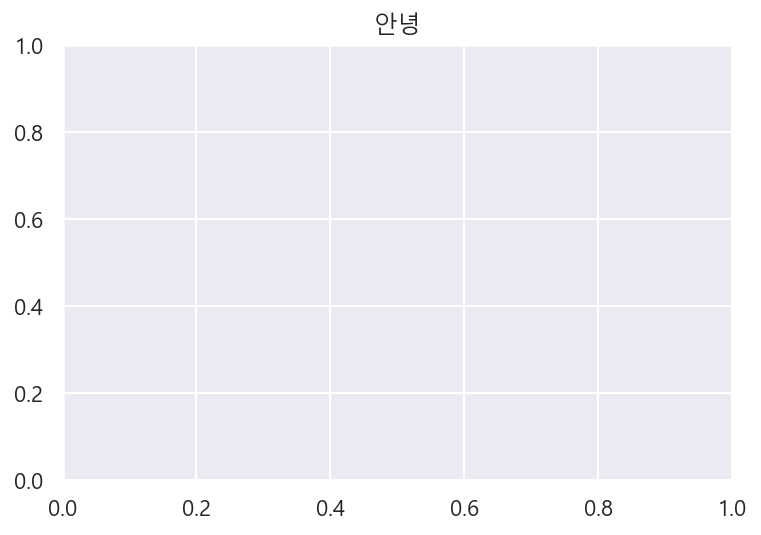

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("안녕")

### 서울시 운동

In [13]:
import pandas as pd

raw_data = pd.read_csv('datas/report.txt', sep='\t')
raw_data.head(3)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8


In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 53 non-null     int64  
 1   대분류                53 non-null     object 
 2   분류                 53 non-null     object 
 3   운동을 할 충분한 시간이 없어서  53 non-null     float64
 4   함께 운동을 할 사람이 없어서   53 non-null     object 
 5   운동을 할 만한 장소가 없어서   53 non-null     float64
 6   운동을 싫어해서           53 non-null     float64
 7   기타                 53 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.4+ KB


In [16]:
raw_data[raw_data['대분류'] == '성별'].head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8


In [17]:
raw_data.drop(['기간'], axis='columns').head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [18]:
raw_data.drop(['기간'], axis='columns', inplace=True)
raw_data.head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [19]:
raw_data = raw_data[raw_data['대분류'] == '성별']
raw_data

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


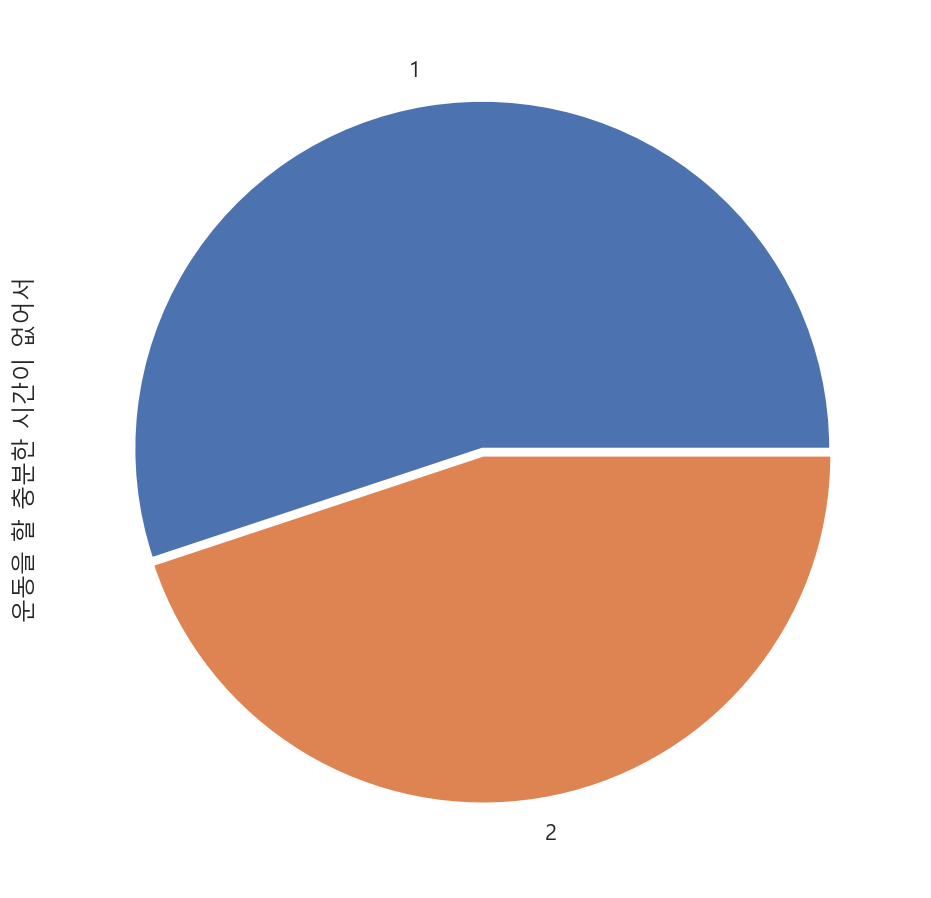

In [21]:
plt.figure(figsize=(10,8)) # 시각화 데이터의 가로세로 사이즈, 단위가 없다, 비율이라 봐도 무방
raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0,0.02])
plt.show()

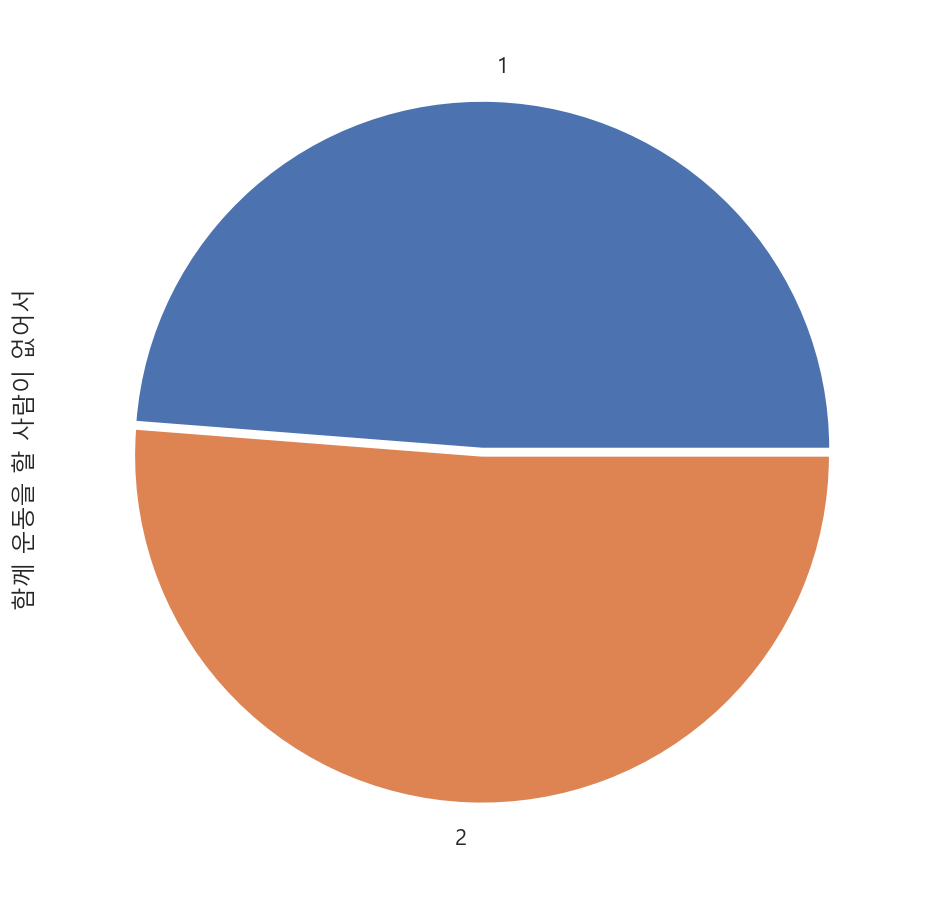

In [23]:
plt.figure(figsize=(10,8)) # 시각화 데이터의 가로세로 사이즈, 단위가 없다, 비율이라 봐도 무방

raw_data['함께 운동을 할 사람이 없어서'] = raw_data['함께 운동을 할 사람이 없어서'].astype('float')

raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0,0.02])
plt.show()

2

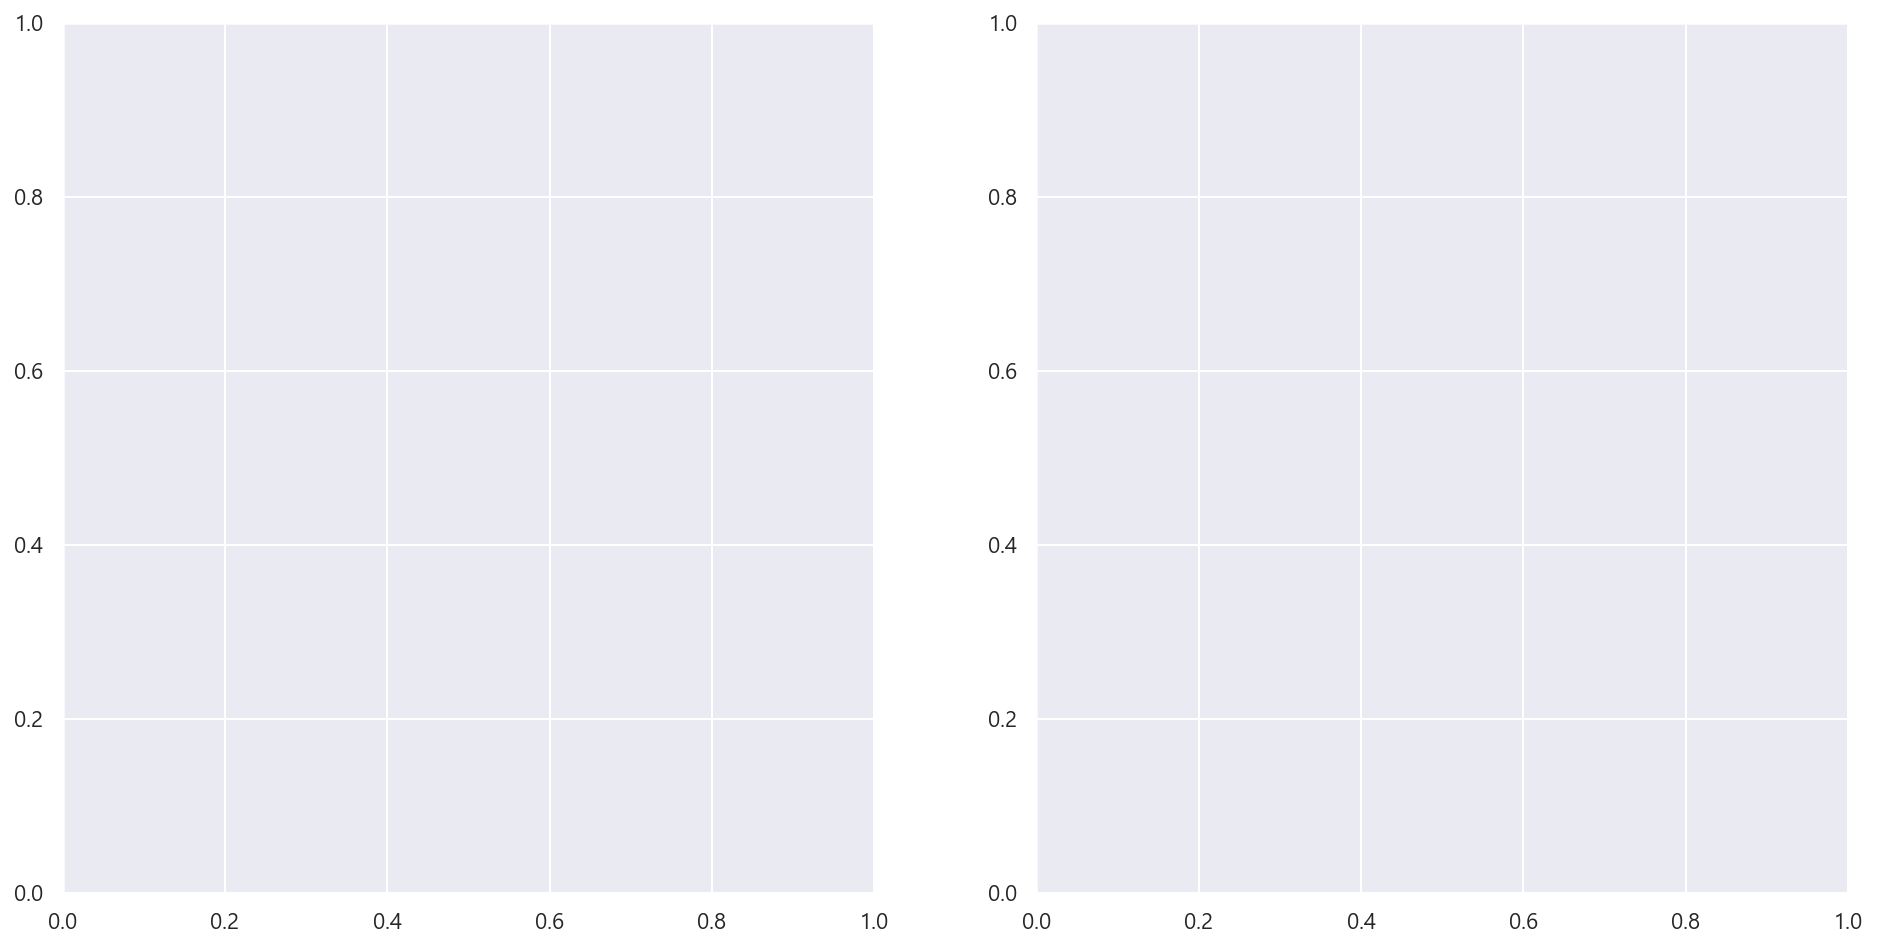

In [24]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
len(ax)

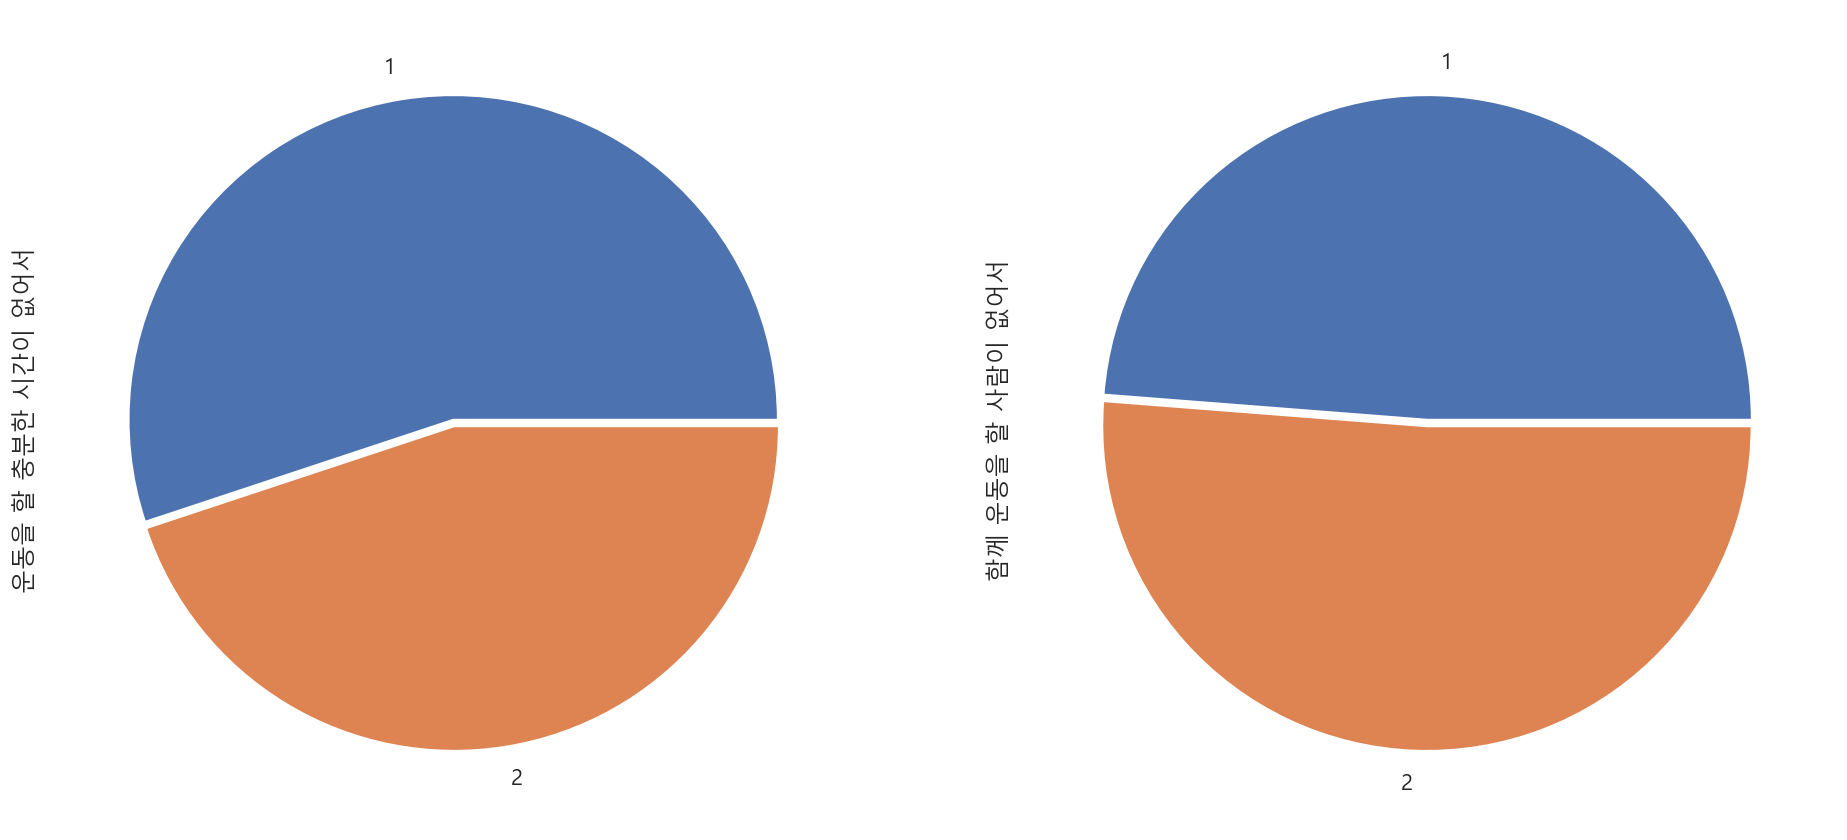

In [26]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0,0.02], ax=ax[0])
# ax=ax[0] 몇번째로 표시할 것인가
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0,0.02], ax=ax[1])

plt.show()

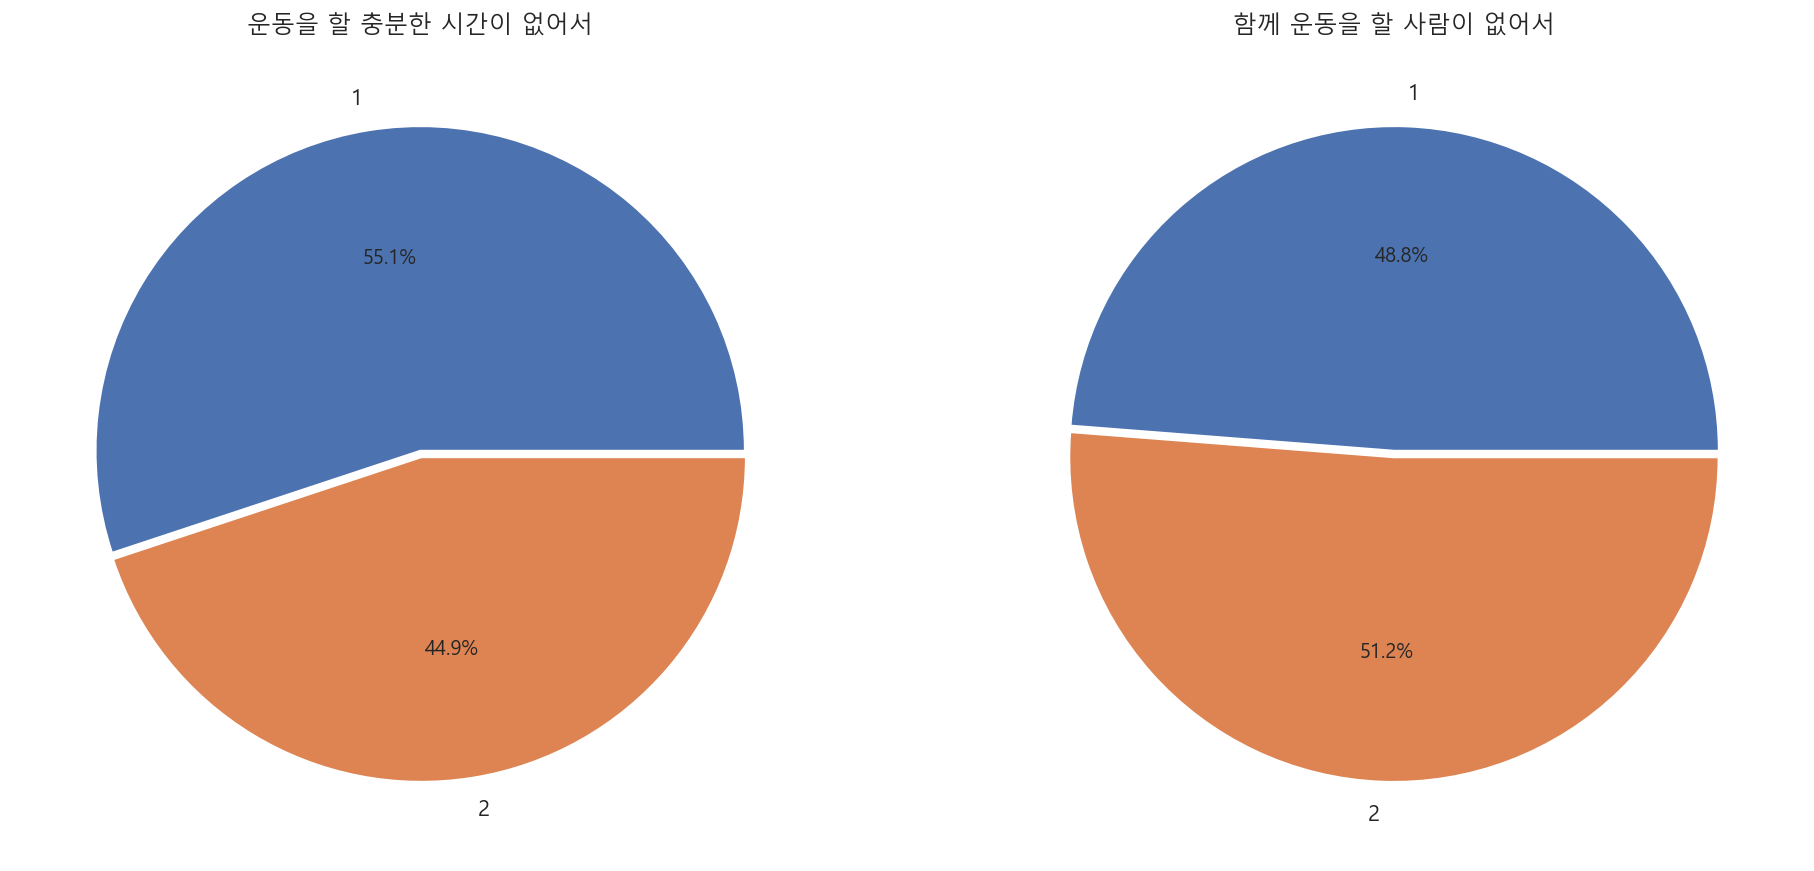

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
# fig, ax = plt.subplots(행, 열, figsize=(16,8))
    #  행, 열로 데이터 나열 가능

raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0,0.02], ax=ax[0], autopct='%1.1f%%')
# autopct='%1.1f%%' 그래프에 % 표시
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0,0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')



plt.show()

### 서울시 흡연자 비율

In [43]:
raw_data2=pd.read_csv("datas/report_2.txt", sep = '\t')
raw_data2.head()

,기간,구분,구분.1,전체,남자,여자
0,2017,서울시,서울시,18.8,35.1,3.3
1,2017,생애주기별,19~29세,19.6,33.6,5.7
2,2017,생애주기별,30~44세,23.6,43.1,3.9
3,2017,생애주기별,45~64세,19.2,37.3,2.5
4,2017,생애주기별,65세 이상,8.4,16.7,1.5


In [44]:
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      39 non-null     int64  
 1   구분      39 non-null     object 
 2   구분.1    39 non-null     object 
 3   전체      39 non-null     float64
 4   남자      39 non-null     float64
 5   여자      39 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [45]:
raw_data2["구분"].unique()

array(['서울시', '생애주기별', '교육수준별Ⅰ(30~64세)', '교육수준별Ⅱ(65세 이상)', '직업별(30~64세)',
       '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [46]:
raw_data2["구분.1"].unique()

array(['서울시', '19~29세', '30~44세', '45~64세', '65세 이상', '중졸이하', '고졸',
       '대졸이상', '초졸이하', '중졸', '고졸이상', '육체직', '서비스ㆍ판매직', '사무직', '종로구', '중구',
       '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
       '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [47]:
raw_data2[raw_data2["구분"] == '생애주기별']

,기간,구분,구분.1,전체,남자,여자
1,2017,생애주기별,19~29세,19.6,33.6,5.7
2,2017,생애주기별,30~44세,23.6,43.1,3.9
3,2017,생애주기별,45~64세,19.2,37.3,2.5
4,2017,생애주기별,65세 이상,8.4,16.7,1.5


In [48]:
raw_data2[raw_data2["구분"] == '생애주기별'][['구분.1','전체','남자','여자']]

,구분.1,전체,남자,여자
1,19~29세,19.6,33.6,5.7
2,30~44세,23.6,43.1,3.9
3,45~64세,19.2,37.3,2.5
4,65세 이상,8.4,16.7,1.5


In [50]:
smoke_age = raw_data2[raw_data2["구분"] == '생애주기별'][['구분.1','전체','남자','여자']]
smoke_age

,구분.1,전체,남자,여자
1,19~29세,19.6,33.6,5.7
2,30~44세,23.6,43.1,3.9
3,45~64세,19.2,37.3,2.5
4,65세 이상,8.4,16.7,1.5


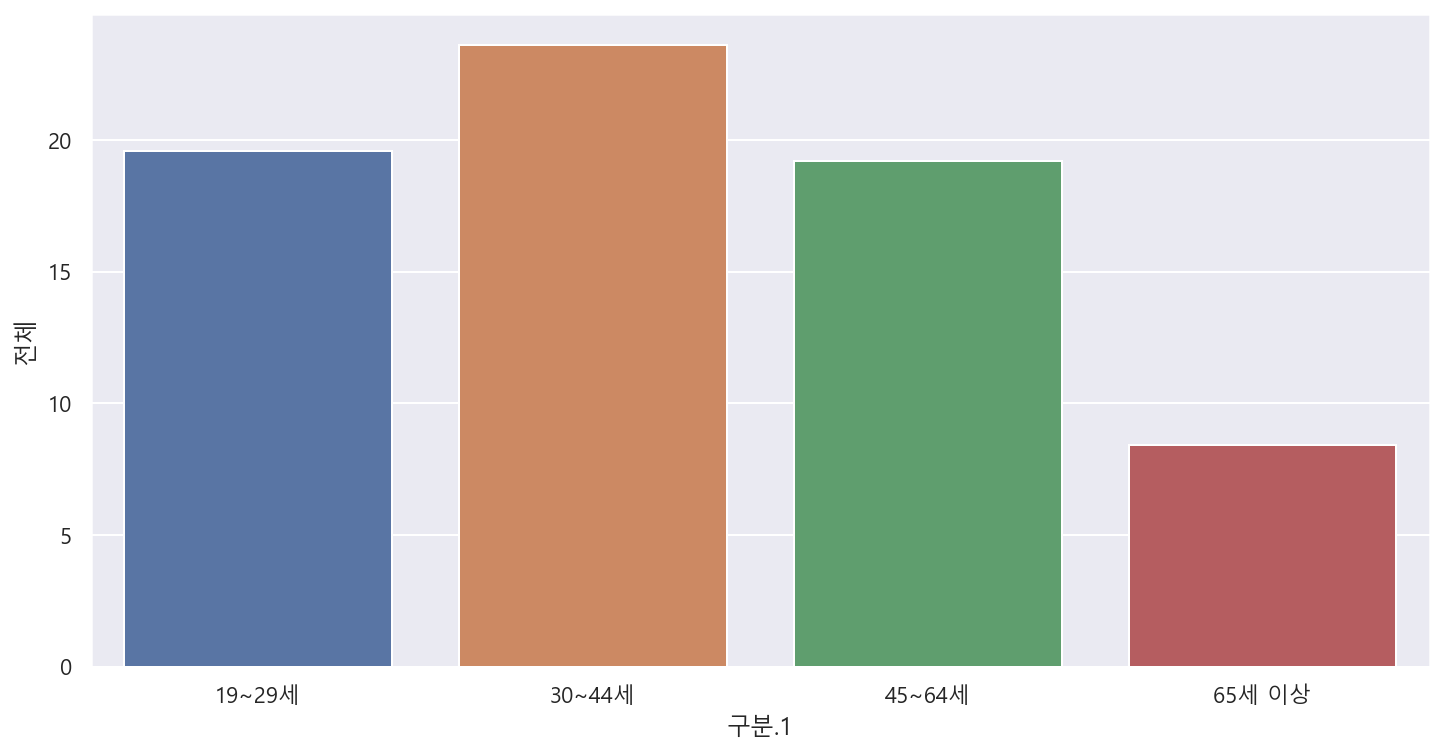

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x='구분.1', y='전체', data=smoke_age)
plt.show()

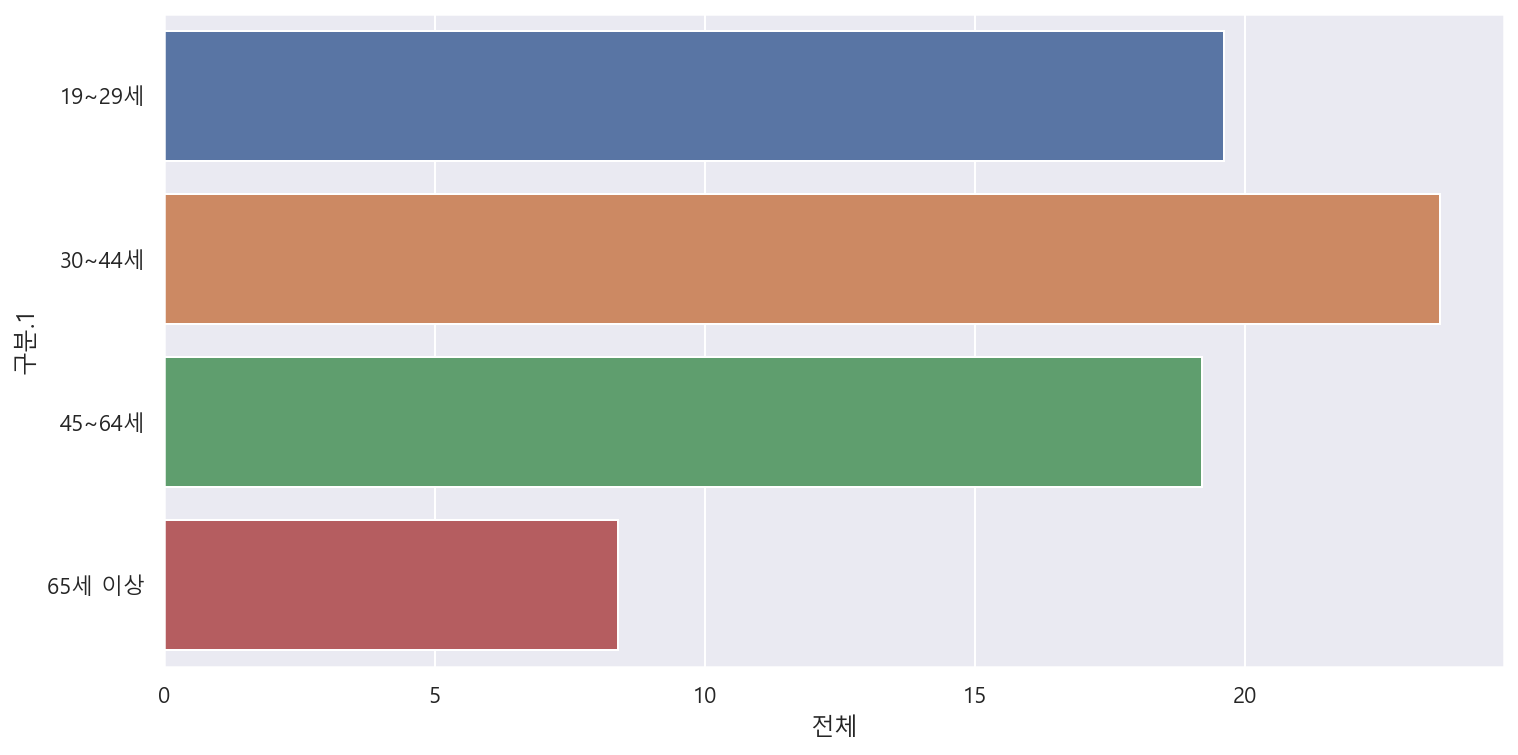

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x='전체', y='구분.1', data=smoke_age)

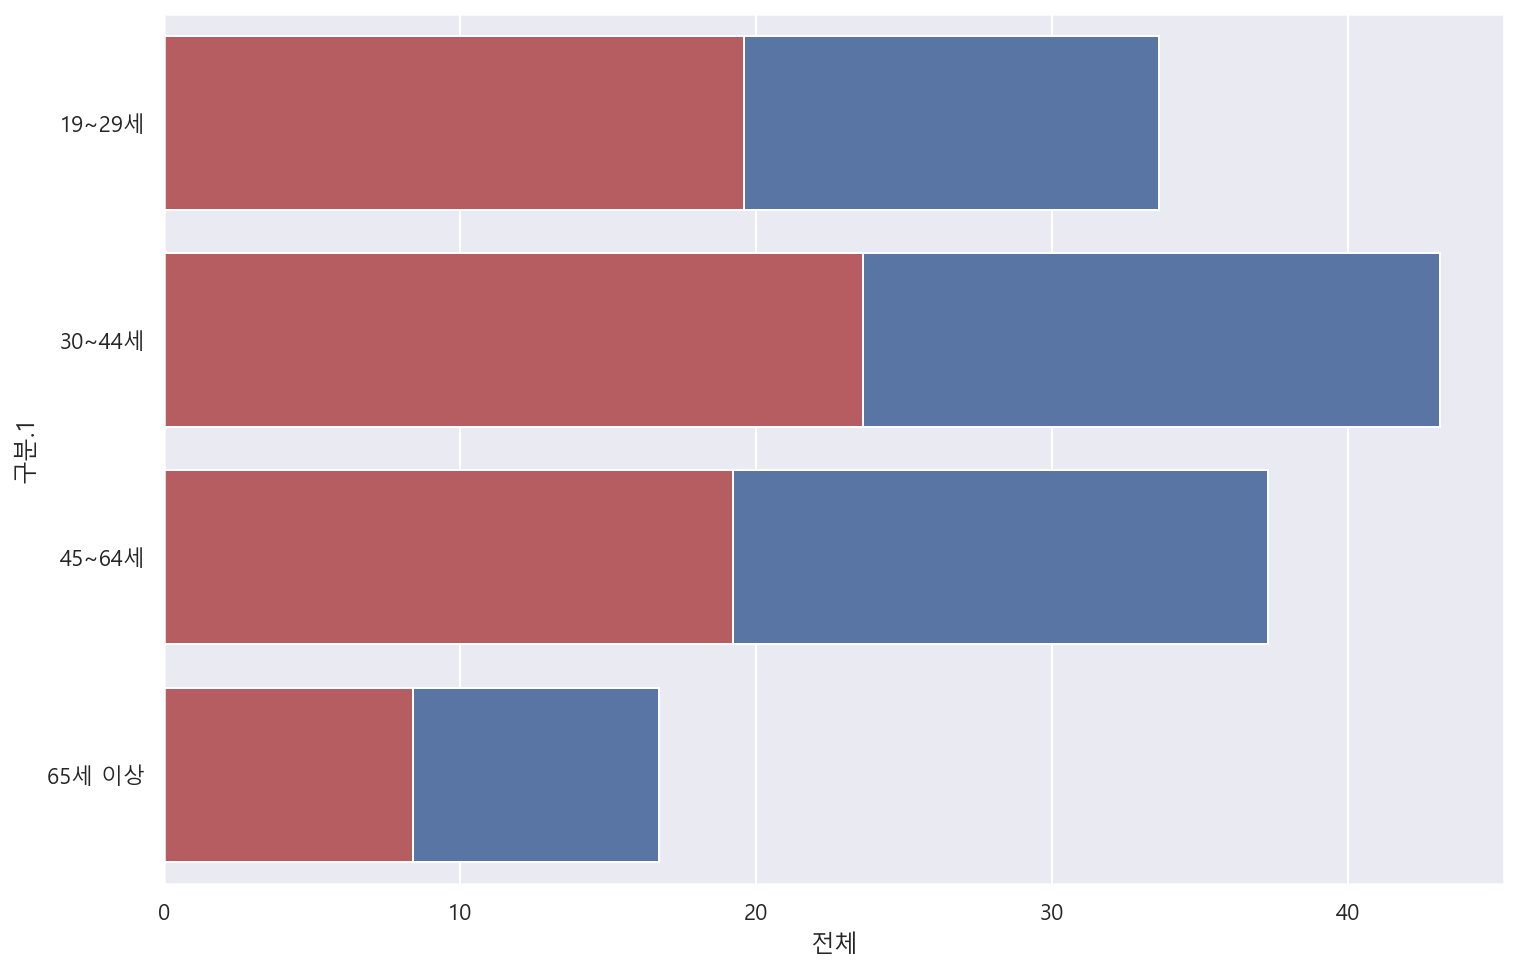

In [54]:
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(x='남자', y='구분.1', data=smoke_age, color ='b')
sns.barplot(x='전체', y='구분.1', data=smoke_age, color ='r')
plt.show()

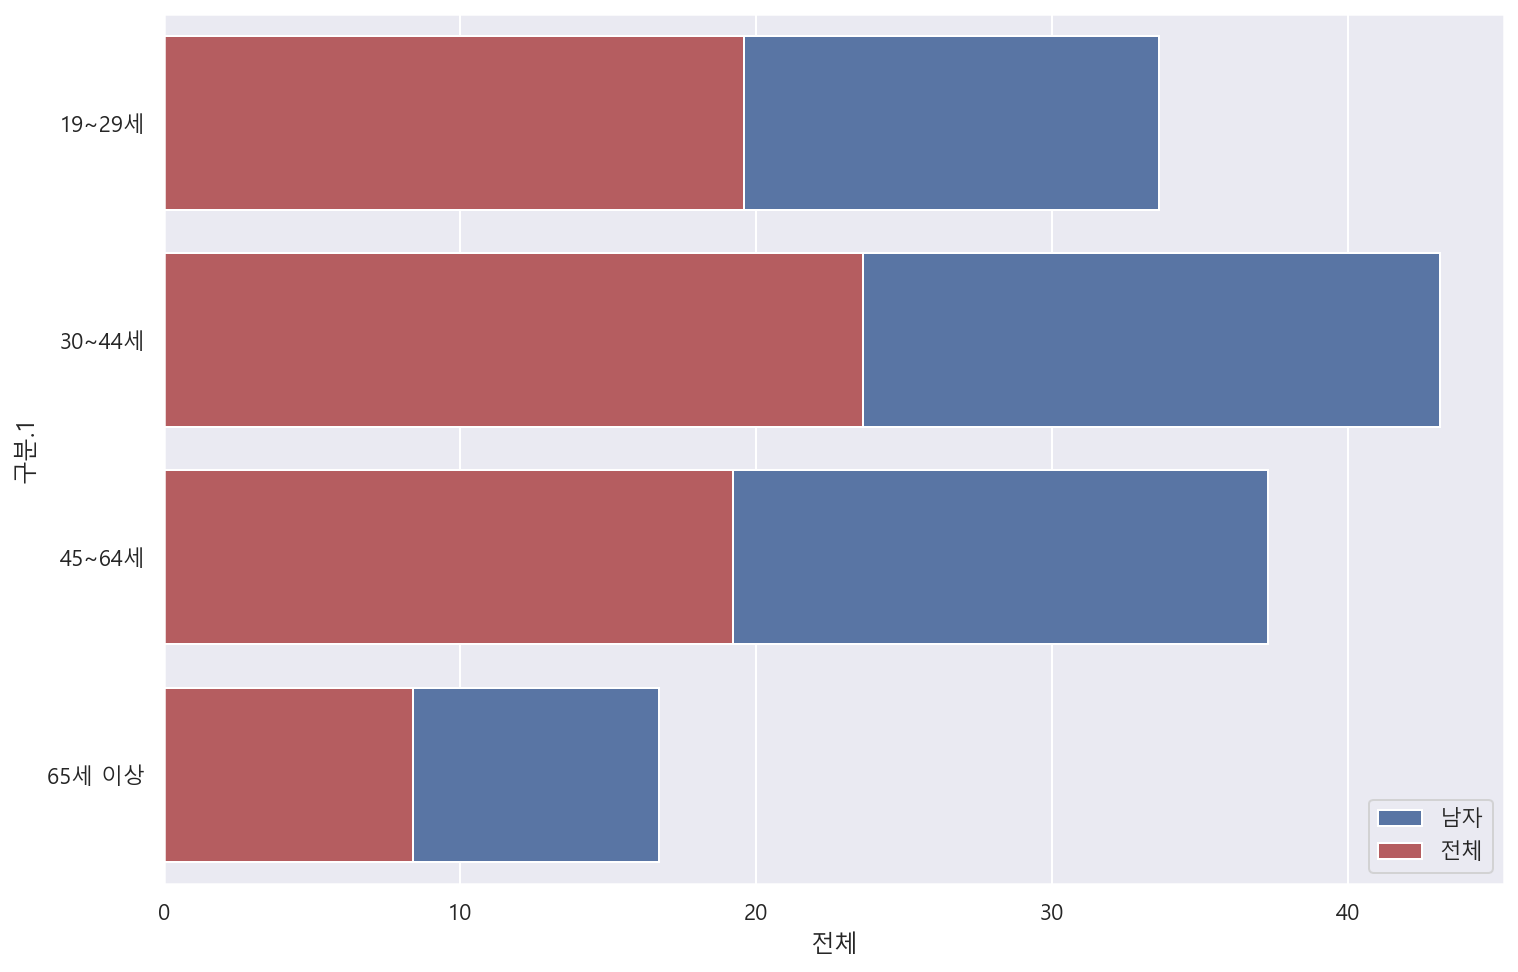

In [56]:
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(x='남자', y='구분.1', data=smoke_age, label='남자', color ='b')
sns.barplot(x='전체', y='구분.1', data=smoke_age, label='전체', color ='r')
plt.legend(loc='lower right')
plt.show()

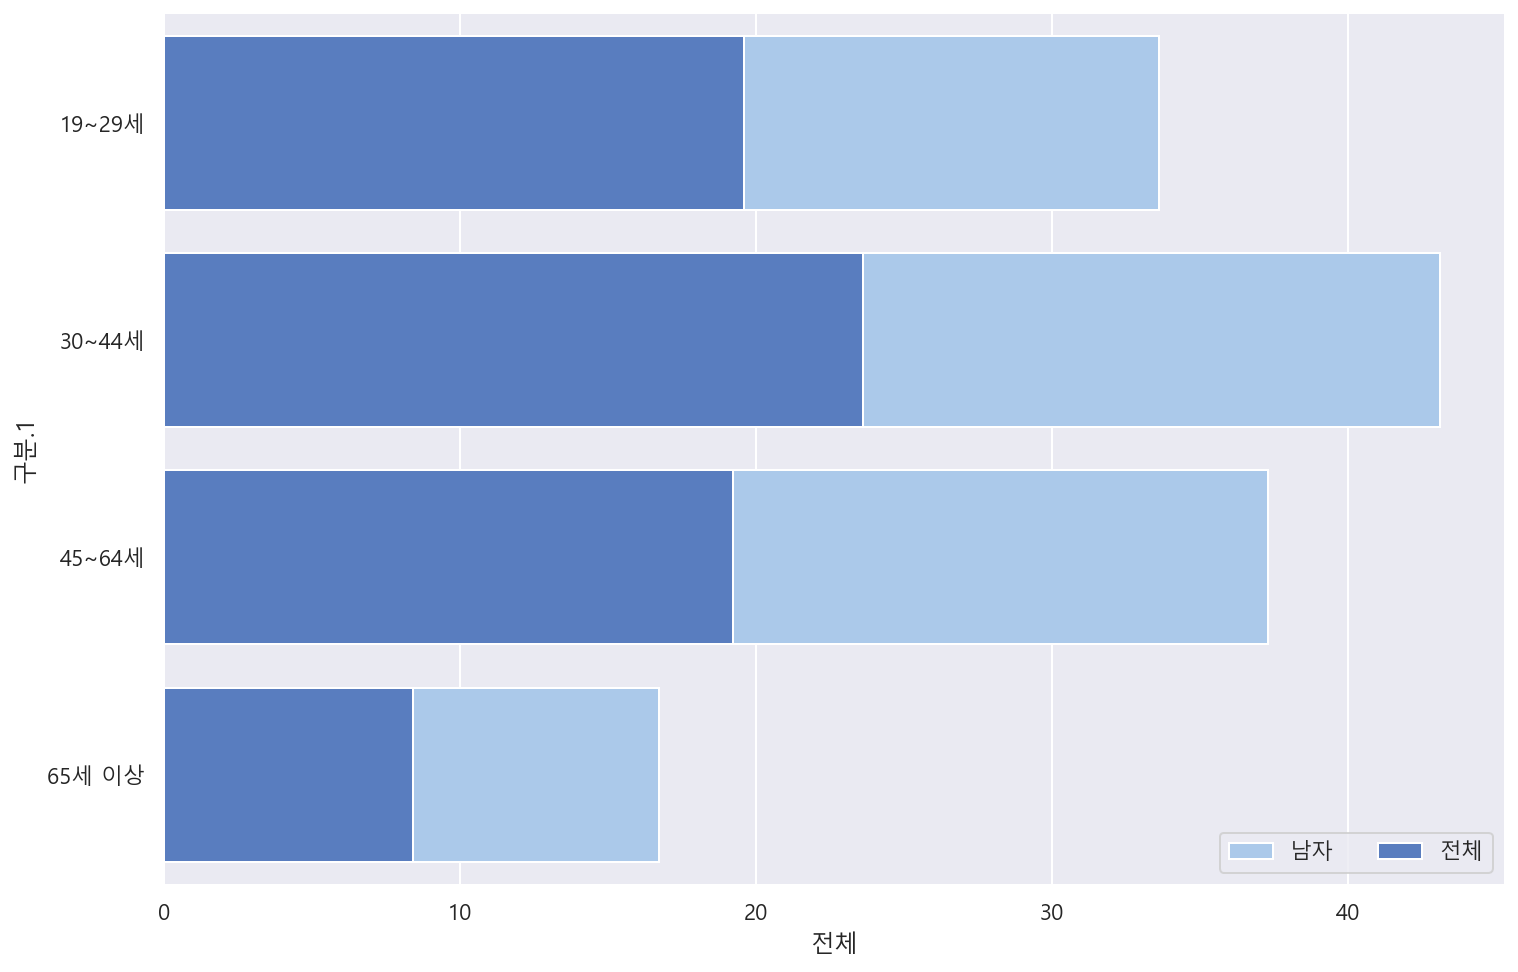

In [58]:
f, ax = plt.subplots(figsize = (12,8))
sns.set_color_codes('pastel')
sns.barplot(x='남자', y='구분.1', data=smoke_age, label='남자', color ='b')

sns.set_color_codes('muted')
sns.barplot(x='전체', y='구분.1', data=smoke_age, label='전체', color ='b')
ax.legend(ncol=2, loc='lower right')
sns.despine(left=True, bottom=True)
plt.show()

### 서울시 인구 통계 자료 분석

In [60]:
# 기본
import matplotlib.pyplot as plt
# 폰트 셋팅
from matplotlib import rc

rc('font',family='Malgun Gothic')

In [96]:
pop_seoul=pd.read_csv("datas/report_3.txt", sep = '\t')
pop_seoul.head(3)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,"4,384,076","9,985,652","4,859,501","5,126,151","9,720,846","4,732,275","4,988,571","264,806","127,226","137,580",2.22,"1,534,957"


In [97]:
# value의 쓸때 없는 데이터 생략, header =2 위에 두줄 없앰
pop_seoul=pd.read_csv("datas/report_3.txt", sep = '\t', header=2, thousands=',')
pop_seoul.head(3)

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
1,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
2,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035


In [98]:
pop_seoul=pop_seoul[['자치구','계','남자','여자','계.2','65세이상고령자']]
pop_seoul.head()

,자치구,계,남자,여자,계.2,65세이상고령자
0,합계,9985652,4859501,5126151,264806,1534957
1,종로구,160520,77745,82775,10137,28203
2,중구,136030,66545,69485,9938,24035
3,용산구,245362,119494,125868,15931,39650
4,성동구,304851,148554,156297,7454,45005


In [99]:
pop_seoul.columns=['구','전체','남자','여자','외국인','65세이상고령자']
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상고령자
0,합계,9985652,4859501,5126151,264806,1534957
1,종로구,160520,77745,82775,10137,28203
2,중구,136030,66545,69485,9938,24035
3,용산구,245362,119494,125868,15931,39650
4,성동구,304851,148554,156297,7454,45005


In [100]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상고령자
1,종로구,160520,77745,82775,10137,28203
2,중구,136030,66545,69485,9938,24035
3,용산구,245362,119494,125868,15931,39650
4,성동구,304851,148554,156297,7454,45005
5,광진구,363925,175083,188842,14351,49457


In [102]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상고령자'] / pop_seoul['전체'] * 100
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상고령자,외국인비율,고령자비율
1,종로구,160520,77745,82775,10137,28203,6.315101,17.569773
2,중구,136030,66545,69485,9938,24035,7.305741,17.668897
3,용산구,245362,119494,125868,15931,39650,6.492855,16.159797
4,성동구,304851,148554,156297,7454,45005,2.445129,14.762950
5,광진구,363925,175083,188842,14351,49457,3.943395,13.589888


In [103]:
pop_seoul.sort_values(by='전체', ascending=False).head(5)

,구,전체,남자,여자,외국인,65세이상고령자,외국인비율,고령자비율
24,송파구,678067,327383,350684,6555,90700,0.966719,13.376259
16,강서구,593203,286668,306535,6267,87032,1.056468,14.671537
23,강남구,546158,261187,284971,4925,73097,0.901754,13.383856
11,노원구,533041,257473,275568,4154,83636,0.779302,15.690350
21,관악구,516318,258740,257578,16578,77341,3.210812,14.979334


In [104]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구,전체,남자,여자,외국인,65세이상고령자,외국인비율,고령자비율
19,영등포구,405154,202648,202506,31805,60071,7.850101,14.826708
2,중구,136030,66545,69485,9938,24035,7.305741,17.668897
18,금천구,250554,128078,122476,18304,38950,7.305411,15.545551
17,구로구,436707,218051,218656,31632,68280,7.243300,15.635197
3,용산구,245362,119494,125868,15931,39650,6.492855,16.159797


In [108]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head(5)

,전체,남자,여자,외국인,65세이상고령자,외국인비율,고령자비율
구,,,,,,,
강북구,315395,153389,162006,3622,62338,1.148401,19.765057
도봉구,331744,161724,170020,2184,60784,0.658339,18.322562
중구,136030,66545,69485,9938,24035,7.305741,17.668897
종로구,160520,77745,82775,10137,28203,6.315101,17.569773
은평구,483938,232423,251515,4414,83272,0.912100,17.207163


In [109]:
pop_seoul.set_index('구', inplace=True)
pop_seoul.head()

KeyError: "None of ['구'] are in the columns"

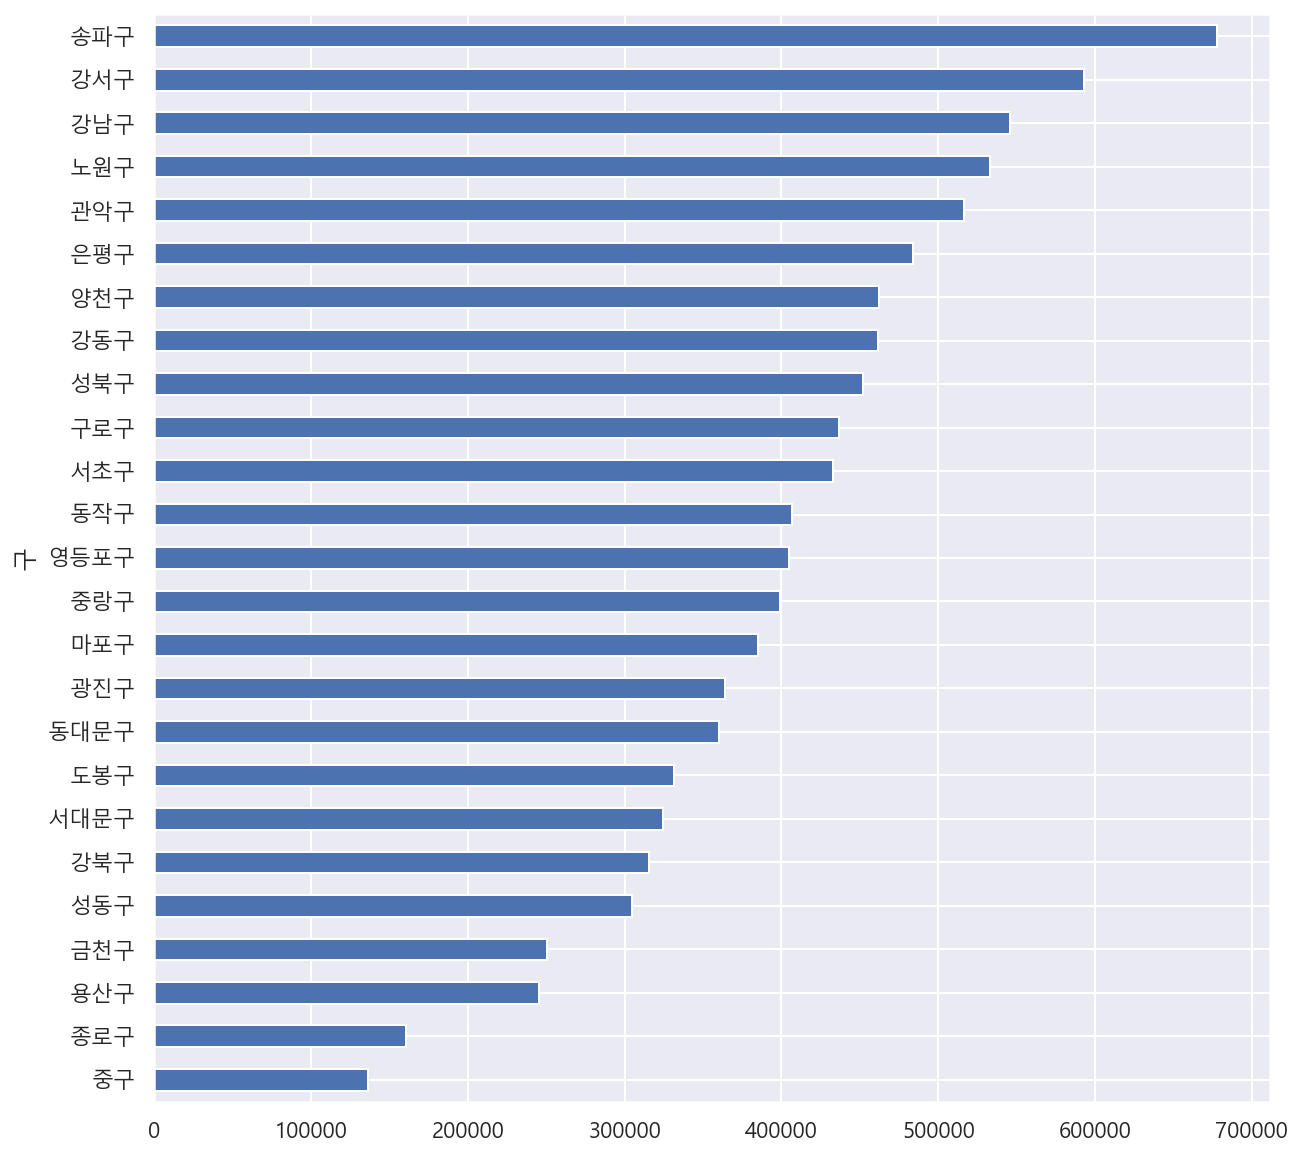

In [111]:
pop_seoul['전체'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));

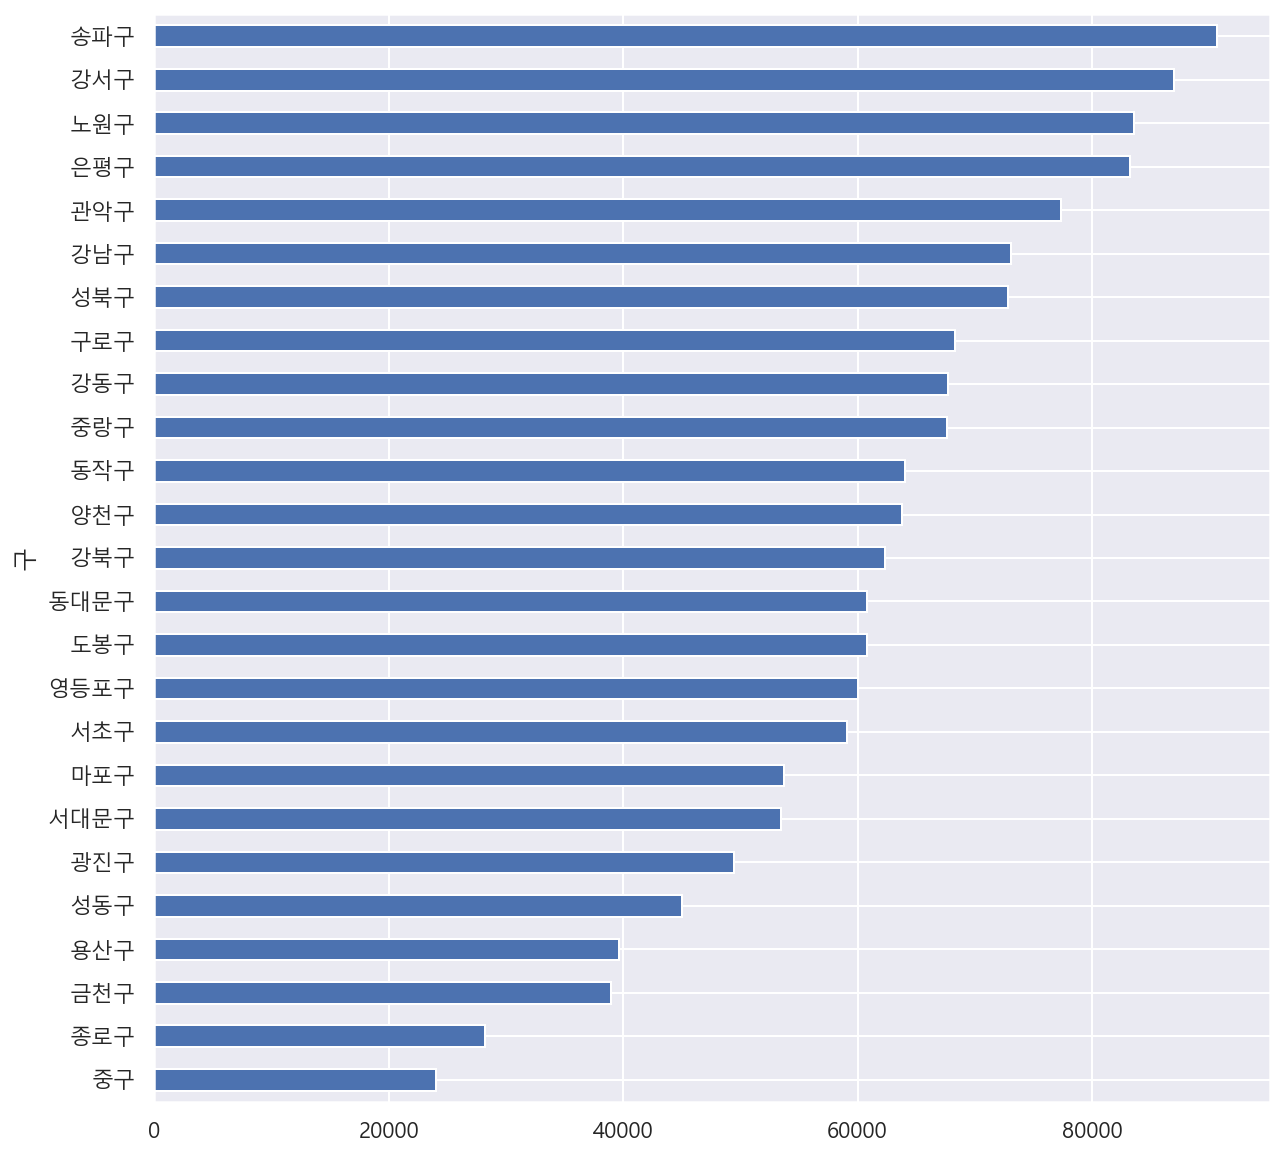

In [112]:
pop_seoul['65세이상고령자'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));

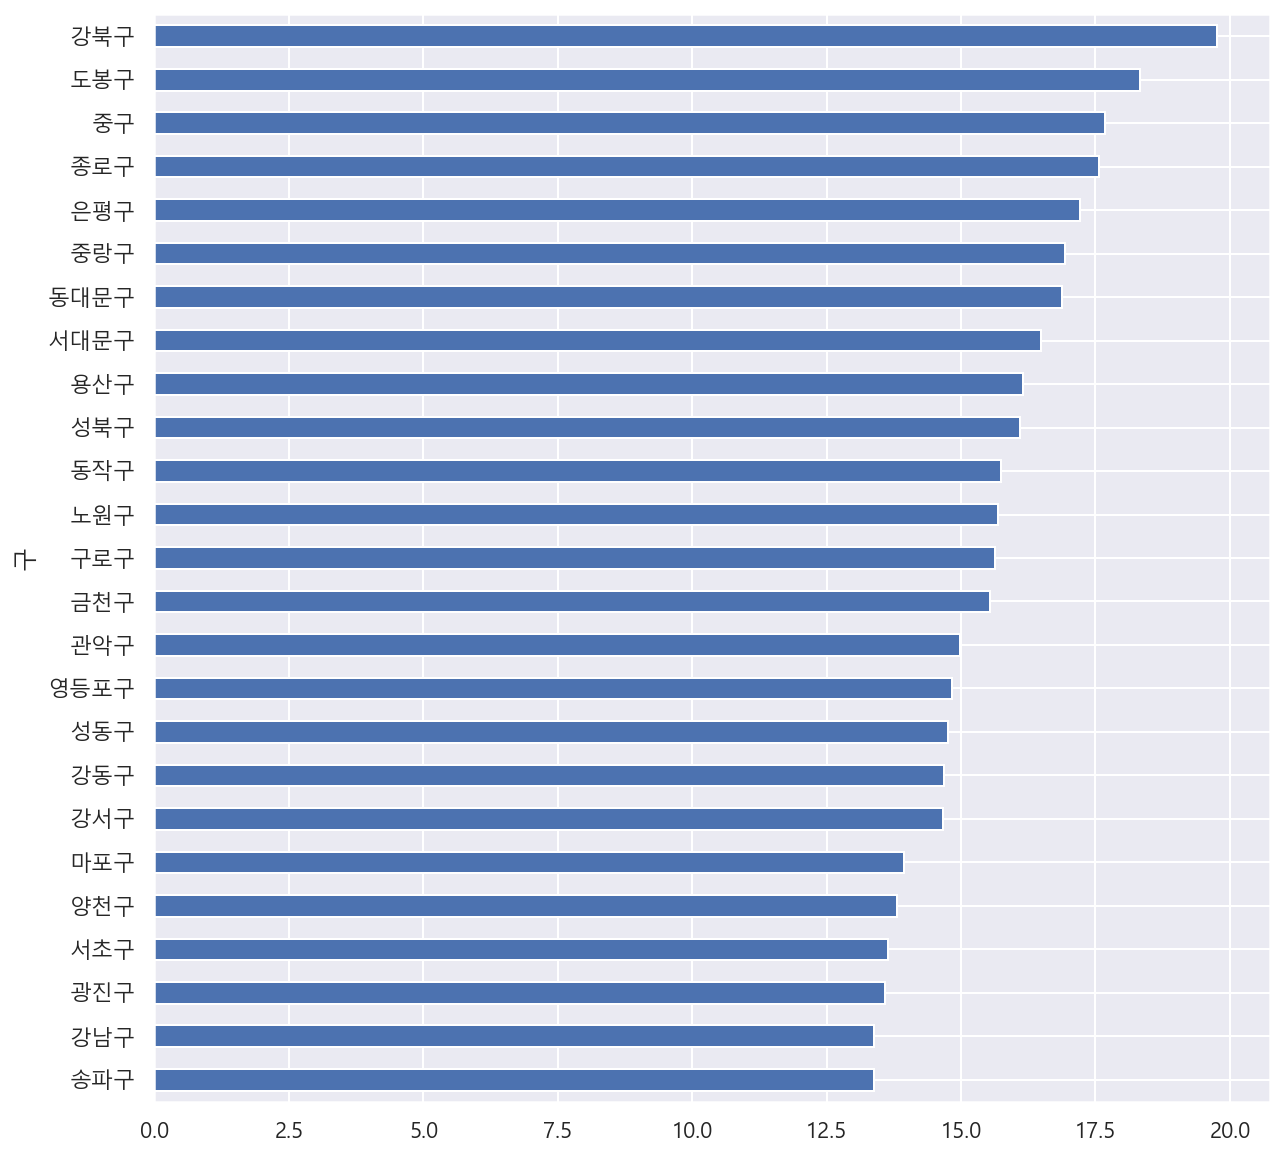

In [113]:
pop_seoul['고령자비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));

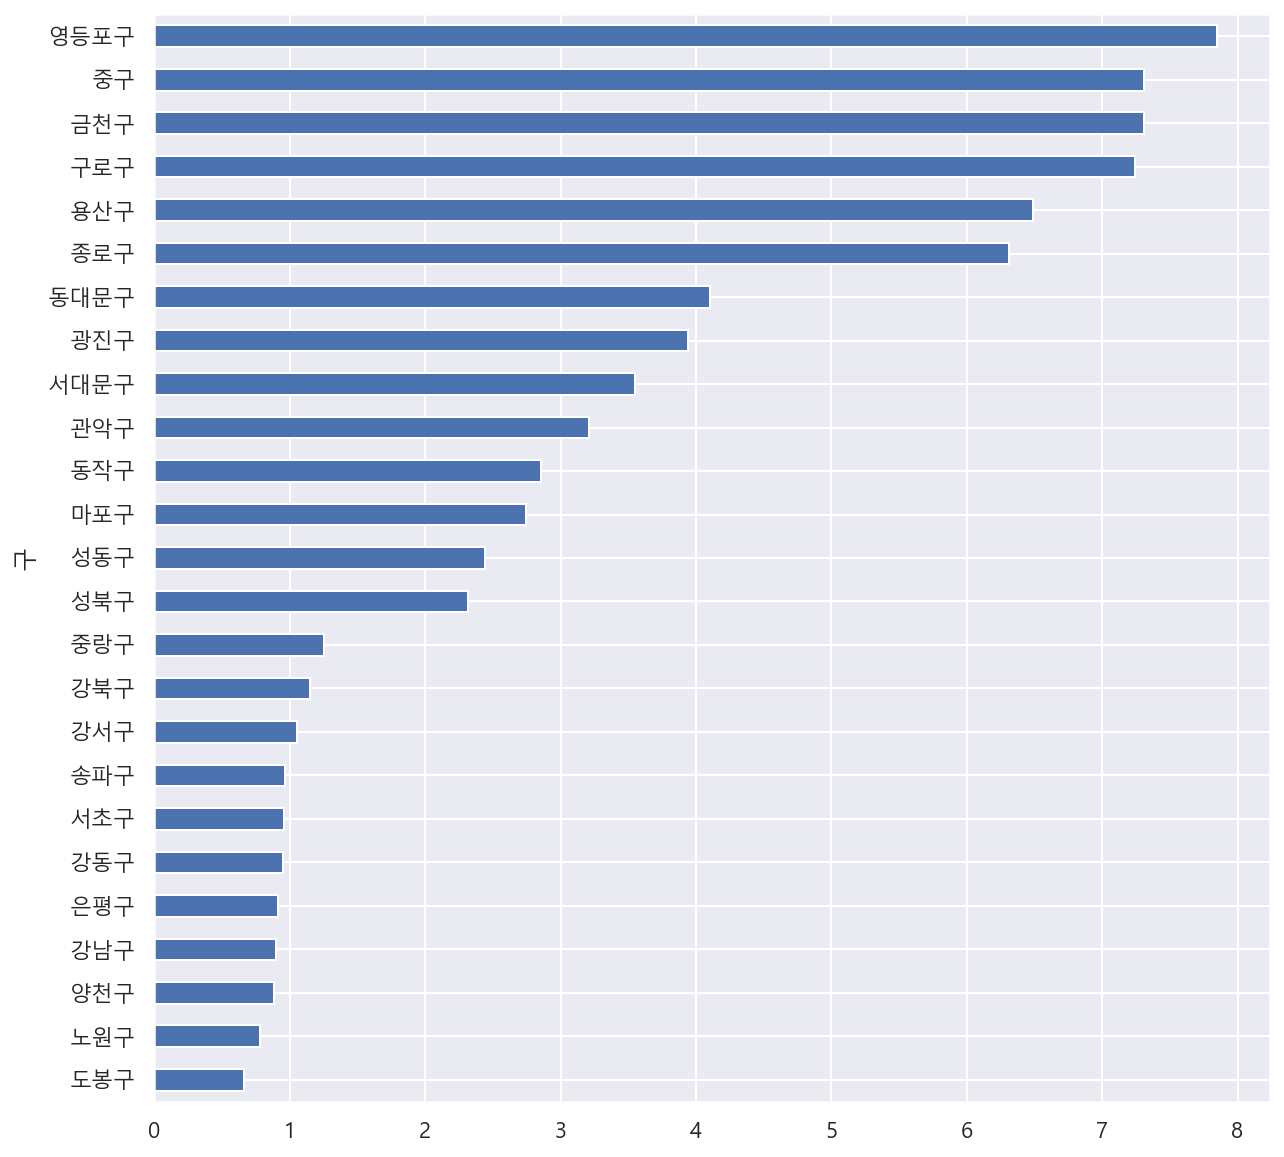

In [114]:
pop_seoul['외국인비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));